In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [4]:
df=pd.read_csv('loan_prediction.csv')
df.head()

,Unnamed: 0,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
2,3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
3,4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
4,5,21.0,female,High School,12951.0,0,OWN,2500.0,VENTURE,7.14,0.19,2.0,532,No,1


In [5]:
#dropping the unnamed column
df=df.drop('Unnamed: 0',axis=1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22000 entries, 0 to 21999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      22000 non-null  float64
 1   person_gender                   22000 non-null  object 
 2   person_education                22000 non-null  object 
 3   person_income                   22000 non-null  float64
 4   person_emp_exp                  22000 non-null  int64  
 5   person_home_ownership           22000 non-null  object 
 6   loan_amnt                       22000 non-null  float64
 7   loan_intent                     22000 non-null  object 
 8   loan_int_rate                   22000 non-null  float64
 9   loan_percent_income             22000 non-null  float64
 10  cb_person_cred_hist_length      22000 non-null  float64
 11  credit_score                    22000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [7]:
#if it is classifiction problem then we need to check its balanced or unbalanced
df['loan_status'].value_counts()

loan_status
0    12000
1    10000
Name: count, dtype: int64

In [8]:
#handling missing values is not required bcz we dont have any Nan Value 
#now clean the dataframe
#clean each and every column but we dont have any problem to clean every column so, we have only two columns to clean
# #clean person_age column, check if age is > 100
df[df['person_age']>100] 

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
9297,144.0,female,Associate,7200766.0,124,MORTGAGE,5000.0,PERSONAL,12.73,0.0,25.0,850,No,0
14930,116.0,male,Bachelor,5545545.0,93,MORTGAGE,3823.0,VENTURE,12.15,0.0,24.0,708,No,0
15113,109.0,male,High School,5556399.0,85,MORTGAGE,6195.0,VENTURE,12.58,0.0,22.0,792,No,0


In [9]:
#check if age<=0
df[df['person_age']<=100]

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
2,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
3,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
4,21.0,female,High School,12951.0,0,OWN,2500.0,VENTURE,7.14,0.19,2.0,532,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
21996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
21997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
21998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [10]:
#drop the age which is > 100 and consider age only <=100
df=df[df['person_age']<=100]

<Axes: ylabel='person_age'>

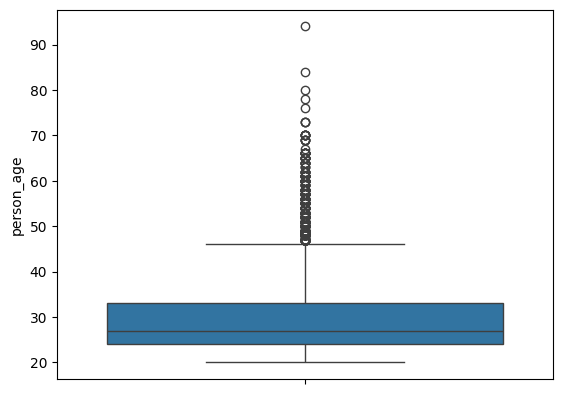

In [11]:
#handling the outliers
sns.boxplot(y='person_age',data=df)
#these outliers can be ignored bcz we know age is lies in between 0 to 100
#generally we check outliers in numeric columns only

<Axes: ylabel='person_income'>

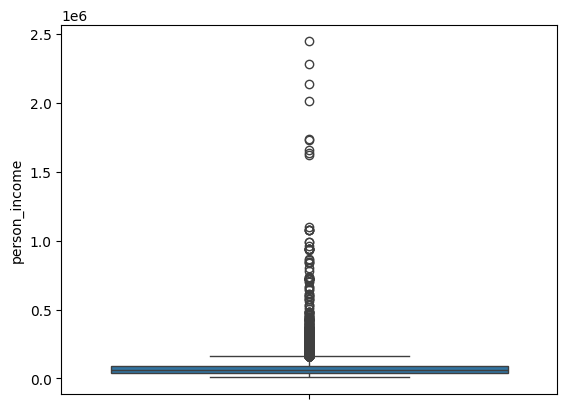

In [12]:
#checking outliers for person_income
sns.boxplot(y='person_income',data=df)

In [13]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,21997.000000,2.199700e+04,21997.000000,21997.000000,21997.000000,21997.000000,21997.000000,21997.000000,21997.000000
mean,29.258490,7.512687e+04,6.733327,9952.679775,11.549953,0.158124,6.899714,633.827386,0.454607
std,7.124086,6.918483e+04,7.175773,6561.095247,3.026160,0.097791,4.587666,50.857061,0.497947
min,20.000000,8.000000e+03,0.000000,563.000000,5.420000,0.000000,2.000000,418.000000,0.000000
25%,24.000000,4.286500e+04,1.000000,5000.000000,9.450000,0.080000,3.000000,602.000000,0.000000
50%,27.000000,6.213000e+04,4.000000,8400.000000,11.230000,0.140000,5.000000,640.000000,0.000000
75%,33.000000,8.965500e+04,10.000000,13650.000000,13.640000,0.220000,9.000000,671.000000,1.000000
max,94.000000,2.448661e+06,76.000000,35000.000000,20.000000,0.630000,30.000000,784.000000,1.000000


In [14]:
df['person_income']
#we cannot remove outliers we may have dataloss here

0        71948.0
1        12438.0
2        79753.0
3        66135.0
4        12951.0
          ...   
21995    47971.0
21996    65800.0
21997    56942.0
21998    33164.0
21999    51609.0
Name: person_income, Length: 21997, dtype: float64

<Axes: ylabel='credit_score'>

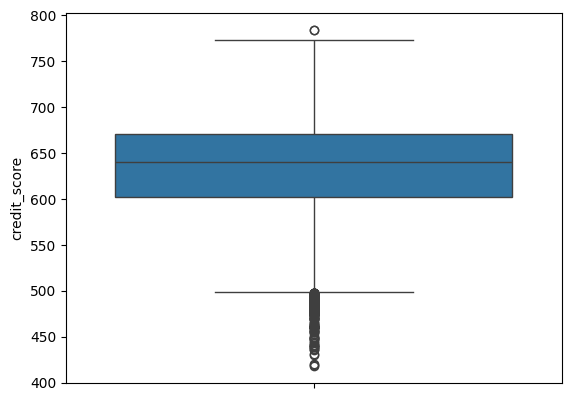

In [15]:
#checking outliers in credit_score column
sns.boxplot(y='credit_score',data=df)

<Axes: ylabel='credit_score'>

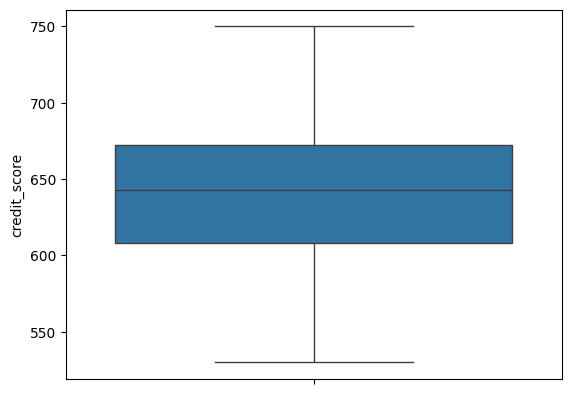

In [16]:
#here we have proper analization so we can remove outliers
df=df[(df['credit_score']>=530)&(df['credit_score']<=750)]
sns.boxplot(y='credit_score',data=df)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21182 entries, 0 to 21999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      21182 non-null  float64
 1   person_gender                   21182 non-null  object 
 2   person_education                21182 non-null  object 
 3   person_income                   21182 non-null  float64
 4   person_emp_exp                  21182 non-null  int64  
 5   person_home_ownership           21182 non-null  object 
 6   loan_amnt                       21182 non-null  float64
 7   loan_intent                     21182 non-null  object 
 8   loan_int_rate                   21182 non-null  float64
 9   loan_percent_income             21182 non-null  float64
 10  cb_person_cred_hist_length      21182 non-null  float64
 11  credit_score                    21182 non-null  int64  
 12  previous_loan_defaults_on_file  21182

In [18]:
#to give a name the datset before converting to numeric
df.to_csv('cleaned_str.csv')

In [19]:
#convert  object column to numeric
from sklearn.preprocessing import LabelEncoder
obj=LabelEncoder()
for i in df.columns:
    if df[i].dtype==object:
        df[i]=obj.fit_transform(df[i])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21182 entries, 0 to 21999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      21182 non-null  float64
 1   person_gender                   21182 non-null  int64  
 2   person_education                21182 non-null  int64  
 3   person_income                   21182 non-null  float64
 4   person_emp_exp                  21182 non-null  int64  
 5   person_home_ownership           21182 non-null  int64  
 6   loan_amnt                       21182 non-null  float64
 7   loan_intent                     21182 non-null  int64  
 8   loan_int_rate                   21182 non-null  float64
 9   loan_percent_income             21182 non-null  float64
 10  cb_person_cred_hist_length      21182 non-null  float64
 11  credit_score                    21182 non-null  int64  
 12  previous_loan_defaults_on_file  21182

In [20]:
#now to find the efficiency of of the model using randomforestclassifier
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3,random_state=42)

In [21]:
from sklearn.ensemble import RandomForestClassifier
rfmodel=RandomForestClassifier(n_estimators=150,max_depth=5,random_state=42)
rfmodel.fit(Xtrain,ytrain)

,n_estimators,150
,criterion,'gini'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [22]:
print('training_efficiency:',rfmodel.score(Xtrain,ytrain))
print('testing_efficiency:',rfmodel.score(Xtest,ytest))

training_efficiency: 0.8902677547717003
testing_efficiency: 0.8856018882769473


In [25]:

with open('rfmodel.pkl','wb')as file:
    pickle.dump(rfmodel,file)
  

In [26]:
import sklearn
print(sklearn.__version__)

1.7.1
